In [11]:
import sys
sys.path.append('../scripts')
from data_preparation import load_data, convert_datatypes, handle_missing_values, drop_columns, remove_negative_values, calculate_zscore
from eda import load_data, convert_datatypes, resample_data_h, resample_data_m

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from scipy.stats import zscore
from windrose import WindroseAxes
plt.style.use('ggplot')

In [13]:
df = load_data('../../data/sierraleone-bumbuna.csv') 

### Step 1 - Understand the Data

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

In [15]:
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


In [16]:
df.dtypes

Timestamp         object
GHI              float64
DNI              float64
DHI              float64
ModA             float64
ModB             float64
Tamb             float64
RH               float64
WS               float64
WSgust           float64
WSstdev          float64
WD               float64
WDstdev          float64
BP                 int64
Cleaning           int64
Precipitation    float64
TModA            float64
TModB            float64
Comments         float64
dtype: object

### Step 2 - Clean and Prepare Data 


In [17]:
#convert_datatypes(df)
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
print("Data Type for Timestamp -",df['Timestamp'].dtypes)
df.head()

Data Type for Timestamp - datetime64[ns]


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04:00,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


Now, let's check for missing values

In [18]:
#handle_missing_values(df)
print(df.isnull().sum())

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


In [19]:
#drop_columns(df)
df = df.drop(['Comments'], axis= 1).copy()
df.shape

(525600, 18)

Now let's look for duplicate values.

In [20]:
print(df.duplicated().sum())

0


We don't have duplicates, so let's move on to handling negative values. The three solar radiation columns, GHI, DNI, DHI have consistent negative values throughout the days. When we take a closer look at the data, there's a direct correlation between these values and night time. And since we're analyzing solar radiation data, we can drop the rows recorded at night or with negative values.

In [21]:
# remove_negative_values(df)
df = df[(df['GHI'] >= 0) & (df['DNI'] >= 0) & (df['DHI'] >= 0)]
df.head(5)

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
432,2021-10-30 07:13:00,17.7,0.0,17.7,20.1,19.2,22.0,98.6,0.2,0.7,0.4,212.8,2.6,1003,0,0.0,22.5,22.9
433,2021-10-30 07:14:00,18.3,0.0,18.3,20.7,19.9,22.0,98.5,0.1,0.7,0.3,221.4,0.4,1003,0,0.0,22.5,22.9
434,2021-10-30 07:15:00,18.9,0.0,18.9,21.4,20.5,22.0,98.6,0.2,0.7,0.5,189.1,6.1,1003,0,0.0,22.6,22.9
435,2021-10-30 07:16:00,19.5,0.0,19.5,22.0,21.1,22.0,98.6,0.4,1.4,0.6,199.4,5.8,1003,0,0.0,22.6,22.9
436,2021-10-30 07:17:00,20.1,0.0,20.1,22.7,21.8,22.0,98.5,0.1,1.1,0.3,192.0,1.0,1003,0,0.0,22.6,22.9


In [22]:
df = df.reset_index(drop=True)
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
0,2021-10-30 07:13:00,17.7,0.0,17.7,20.1,19.2,22.0,98.6,0.2,0.7,0.4,212.8,2.6,1003,0,0.0,22.5,22.9
1,2021-10-30 07:14:00,18.3,0.0,18.3,20.7,19.9,22.0,98.5,0.1,0.7,0.3,221.4,0.4,1003,0,0.0,22.5,22.9
2,2021-10-30 07:15:00,18.9,0.0,18.9,21.4,20.5,22.0,98.6,0.2,0.7,0.5,189.1,6.1,1003,0,0.0,22.6,22.9
3,2021-10-30 07:16:00,19.5,0.0,19.5,22.0,21.1,22.0,98.6,0.4,1.4,0.6,199.4,5.8,1003,0,0.0,22.6,22.9
4,2021-10-30 07:17:00,20.1,0.0,20.1,22.7,21.8,22.0,98.5,0.1,1.1,0.3,192.0,1.0,1003,0,0.0,22.6,22.9


#### Z-Score Analysis

Now, let's move on to outliers. Outliers can be calculated using Z-Score. A Z-Score measures how many standard deviations a data point is from the mean of the dataset. Here we can exclude the Timestamp column because it is consistent and calculating it's Z-Score issues a performance warning due to Adding/subtracting object-dtype array to DatetimeArray not being vectorized.

In [23]:
df_for_zscore = df.drop(['Timestamp'], axis= 1).copy()
df_for_zscore.head(5)

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
0,17.7,0.0,17.7,20.1,19.2,22.0,98.6,0.2,0.7,0.4,212.8,2.6,1003,0,0.0,22.5,22.9
1,18.3,0.0,18.3,20.7,19.9,22.0,98.5,0.1,0.7,0.3,221.4,0.4,1003,0,0.0,22.5,22.9
2,18.9,0.0,18.9,21.4,20.5,22.0,98.6,0.2,0.7,0.5,189.1,6.1,1003,0,0.0,22.6,22.9
3,19.5,0.0,19.5,22.0,21.1,22.0,98.6,0.4,1.4,0.6,199.4,5.8,1003,0,0.0,22.6,22.9
4,20.1,0.0,20.1,22.7,21.8,22.0,98.5,0.1,1.1,0.3,192.0,1.0,1003,0,0.0,22.6,22.9


Since a z-score greater than 3 or less than -3 is considered extreme, here we're filtering outliers greater than the absolute value of 3.

In [24]:
# calculate_zscore(df)
df_zscores = (df_for_zscore - df_for_zscore.mean()) / df_for_zscore.std()
outliers = df_zscores.abs() > 3
df['Outliers'] = outliers.any(axis=1)
outlier_rows = df[df['Outliers'] == True]
print("Count of rows with outlier values -", df['Outliers'].sum())
print(outlier_rows.head(5))

Count of rows with outlier values - 7081
              Timestamp    GHI   DNI    DHI   ModA   ModB  Tamb    RH   WS  \
11  2021-10-30 07:24:00   24.7   0.0   24.7   27.7   26.6  22.1  98.8  1.5   
24  2021-10-30 08:13:00   62.9   0.1   62.9   70.2   67.9  22.2  99.2  0.4   
34  2021-10-30 08:23:00   99.3   0.1   99.3  110.0  106.5  22.2  98.6  0.1   
57  2021-10-30 08:46:00  188.1   0.6  188.0  192.1  186.2  22.6  97.7  0.0   
128 2021-10-30 09:57:00  485.2  53.0  417.5  471.8  460.7  24.5  87.8  0.4   

     WSgust  WSstdev     WD  WDstdev    BP  Cleaning  Precipitation  TModA  \
11      2.1      0.4  185.5      8.4  1003         0            0.1   22.7   
24      1.1      0.5  176.9     11.1  1003         0            0.1   23.8   
34      1.1      0.4  157.2      0.5  1003         0            0.1   24.5   
57      0.0      0.0    0.0      0.0  1003         0            0.1   28.2   
128     1.1      0.5   77.5      0.3  1003         1            0.0   46.5   

     TModB  Outliers 

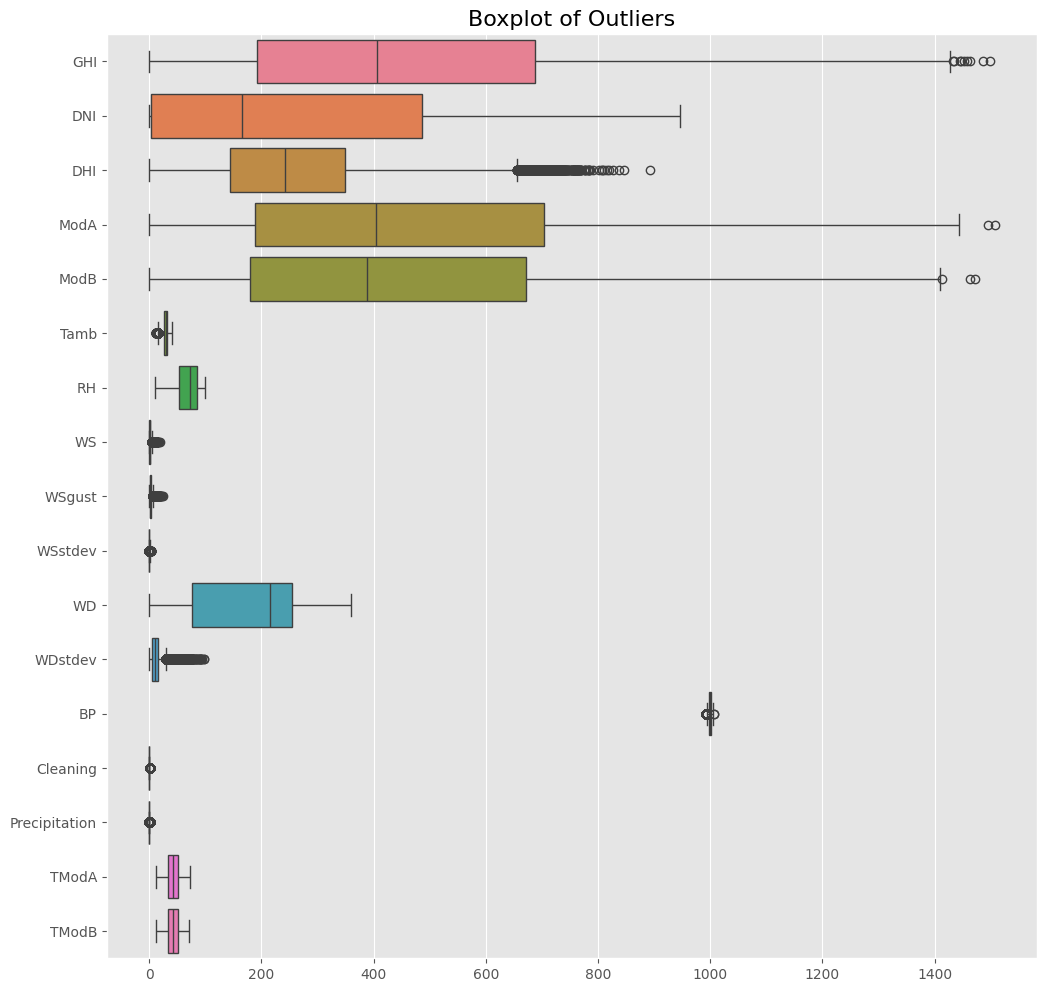

In [25]:
plt.figure(figsize=(12, 12))
sns.boxplot(data=df_for_zscore, orient='y')
plt.title('Boxplot of Outliers', fontsize=16)
plt.show()

Here we can see that columns DHI, WD, WSgust, WS have outlier values.

In [26]:
df = df.drop(['Outliers'], axis= 1).copy()

We've gone throught the data preparation steps, now let's save our cleaned data for exploratory data analysis.

In [27]:
df.to_csv("../../data/cleaned/sierraleone_cleaned.csv", index=False)


### Step 3 Exploratory Data Analysis


In [28]:
df = load_data('../../data/cleaned/sierraleone_cleaned.csv')
df.head(5)

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
0,2021-10-30 07:13:00,17.7,0.0,17.7,20.1,19.2,22.0,98.6,0.2,0.7,0.4,212.8,2.6,1003,0,0.0,22.5,22.9
1,2021-10-30 07:14:00,18.3,0.0,18.3,20.7,19.9,22.0,98.5,0.1,0.7,0.3,221.4,0.4,1003,0,0.0,22.5,22.9
2,2021-10-30 07:15:00,18.9,0.0,18.9,21.4,20.5,22.0,98.6,0.2,0.7,0.5,189.1,6.1,1003,0,0.0,22.6,22.9
3,2021-10-30 07:16:00,19.5,0.0,19.5,22.0,21.1,22.0,98.6,0.4,1.4,0.6,199.4,5.8,1003,0,0.0,22.6,22.9
4,2021-10-30 07:17:00,20.1,0.0,20.1,22.7,21.8,22.0,98.5,0.1,1.1,0.3,192.0,1.0,1003,0,0.0,22.6,22.9


Since we're importing a new csv file, we have to check the datatypes of the columns.

In [29]:
df.dtypes

Timestamp         object
GHI              float64
DNI              float64
DHI              float64
ModA             float64
ModB             float64
Tamb             float64
RH               float64
WS               float64
WSgust           float64
WSstdev          float64
WD               float64
WDstdev          float64
BP                 int64
Cleaning           int64
Precipitation    float64
TModA            float64
TModB            float64
dtype: object

##### Change datatypes to appropriate formats
In the previous step, the Timestamp colum has a data type of Object. So, here it's changed to date time format.

Timestamp colum has a data type of Object. So, it has to be changed to date time format.

In [30]:
convert_datatypes(df)

#### Summary Statistcs

In [31]:
df.describe()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
count,238872,238872.000000,238872.000000,238872.000000,238872.000000,238872.000000,238872.000000,238872.000000,238872.000000,238872.000000,238872.000000,238872.000000,238872.000000,238872.000000,238872.000000,238872.000000,238872.000000,238872.000000
mean,2022-04-29 16:11:54.242439424,445.471047,256.390219,251.600694,449.875422,431.288071,29.144408,68.701027,1.568610,2.297283,0.473658,177.697873,10.755592,999.467556,0.002060,0.001615,42.787084,42.607726
min,2021-10-30 07:13:00,0.000000,0.000000,0.000000,0.000000,0.000000,12.400000,9.900000,0.000000,0.000000,0.000000,0.000000,0.000000,993.000000,0.000000,0.000000,11.700000,12.000000
25%,2022-01-30 11:03:45,192.200000,3.100000,143.900000,188.300000,180.100000,25.900000,52.900000,0.400000,1.400000,0.400000,76.900000,5.200000,998.000000,0.000000,0.000000,33.800000,34.000000
50%,2022-04-29 07:21:30,406.100000,166.300000,242.400000,403.900000,387.800000,29.300000,72.900000,1.500000,2.400000,0.500000,216.100000,10.600000,1000.000000,0.000000,0.000000,42.700000,43.100000
75%,2022-07-27 12:58:15,687.400000,485.600000,348.900000,703.800000,671.800000,32.300000,85.600000,2.400000,3.400000,0.600000,254.700000,15.200000,1001.000000,0.000000,0.000000,52.200000,51.800000
max,2022-10-29 17:48:00,1499.000000,946.000000,892.000000,1507.000000,1473.000000,39.900000,100.000000,19.200000,23.900000,4.100000,360.000000,98.400000,1006.000000,1.000000,2.400000,72.800000,70.400000
std,NaN,294.381895,263.173538,141.632581,300.153437,288.670600,4.202268,22.136594,1.225995,1.531143,0.265979,105.684921,8.054122,2.354675,0.045337,0.030674,11.545187,10.983106


### Step 3: Feature Understanding

##### Visualize data distribution and frequency with Histograms 

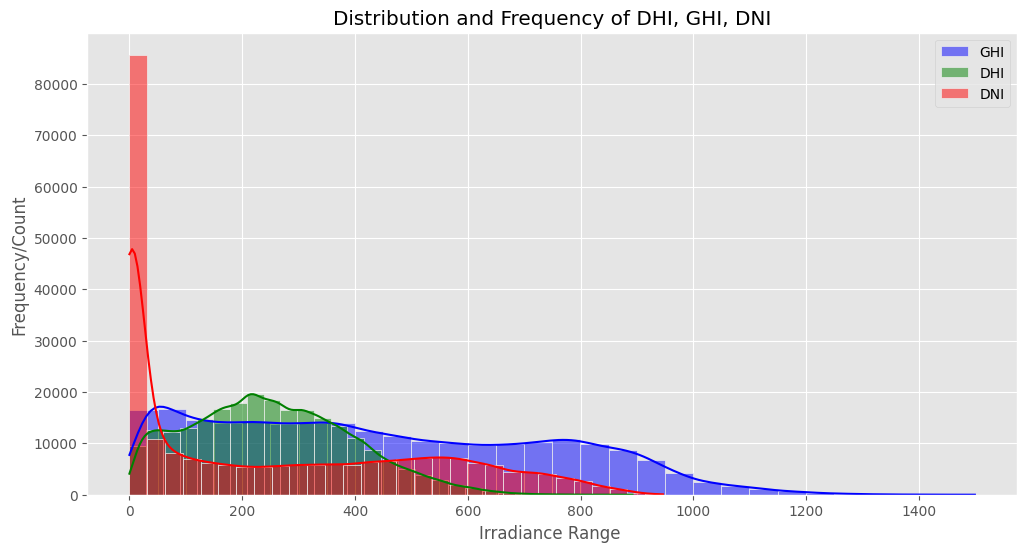

In [32]:
plt.figure(figsize=(12, 6))

sns.histplot(df['GHI'], bins=30, color='blue', label='GHI', kde=True)
sns.histplot(df['DHI'], bins=30, color='green', label='DHI', kde=True)
sns.histplot(df['DNI'], bins=30, color='red', label='DNI', kde=True)

plt.title('Distribution and Frequency of DHI, GHI, DNI')
plt.xlabel('Irradiance Range ')
plt.ylabel('Frequency/Count')
plt.legend()
plt.show()

#### TimeSeries Analysis

We can use a timeseries analysis to see trends and fluctuations over a period of time.

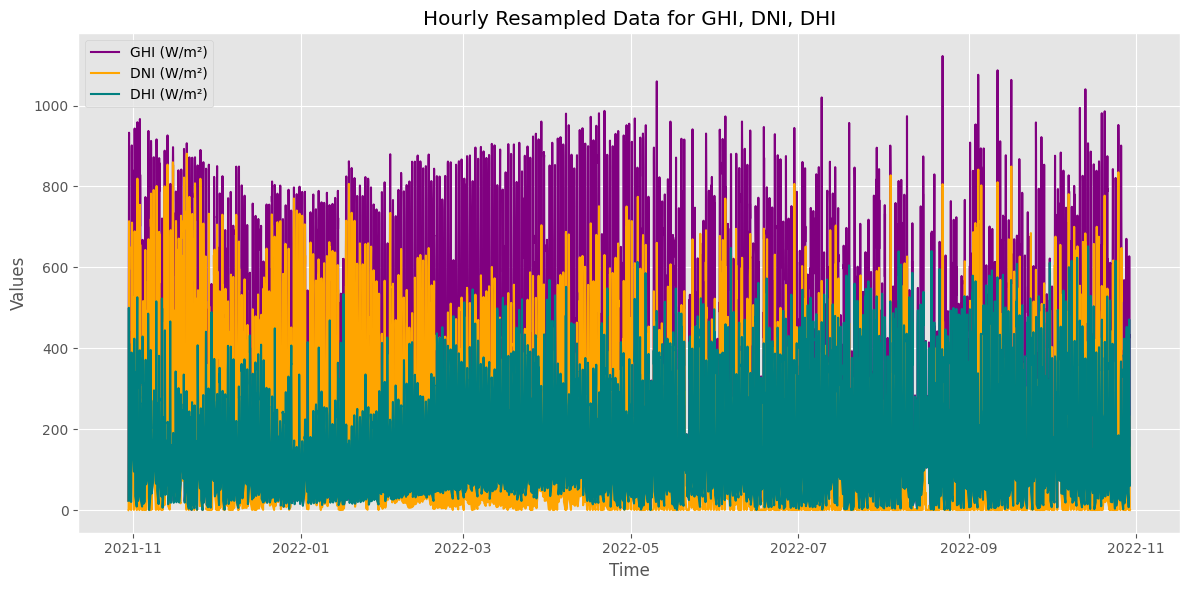

In [33]:
# Resample Timestamp by Hour
hourly_data = resample_data_h(df)

plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_data, x=hourly_data.index, y='GHI', label='GHI (W/m²)', color='purple')
sns.lineplot(data=hourly_data, x=hourly_data.index, y='DNI', label='DNI (W/m²)', color='orange')
sns.lineplot(data=hourly_data, x=hourly_data.index, y='DHI', label='DHI (W/m²)', color='teal')

plt.title('Hourly Resampled Data for GHI, DNI, DHI')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

The above graph shows hourly solar radiation measures over a year with high granularity. Let's resample our data to see the monthy trends.

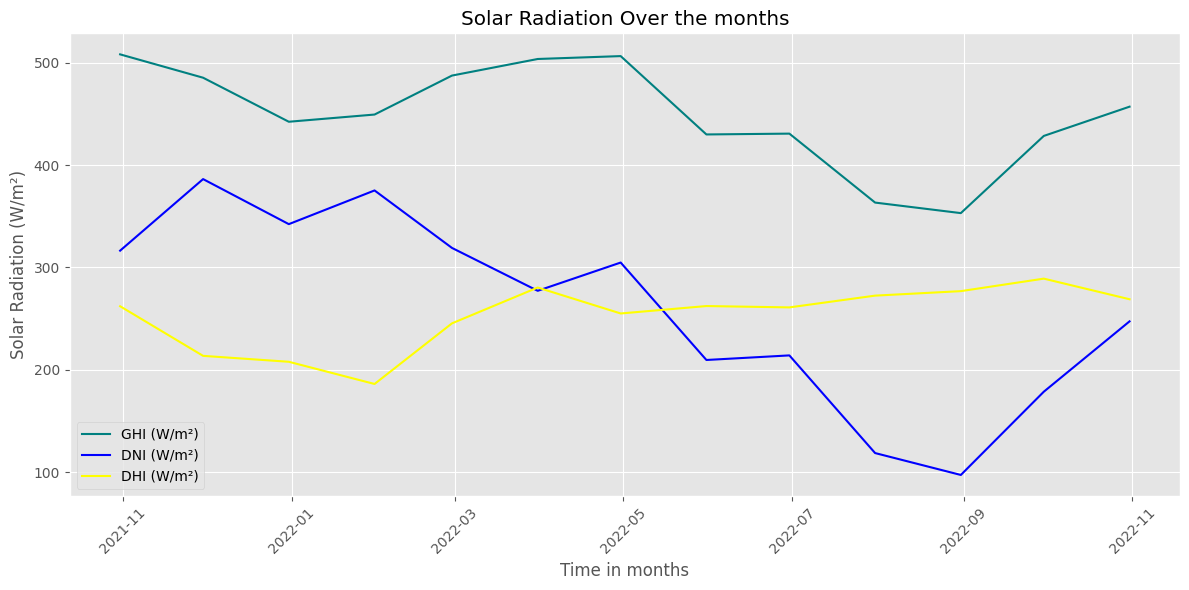

In [34]:
monthly_data = resample_data_m(df)

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_data, x=monthly_data.index, y='GHI', label='GHI (W/m²)', color='teal')
sns.lineplot(data=monthly_data, x=monthly_data.index, y='DNI', label='DNI (W/m²)', color='blue')
sns.lineplot(data=monthly_data, x=monthly_data.index, y='DHI', label='DHI (W/m²)', color='yellow')

plt.title('Solar Radiation Over the months')
plt.xlabel('Time in months')
plt.ylabel('Solar Radiation (W/m²)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()

The line plot shows peaks and low points in our data and an overall trend line.

Now let's plot the Ambient Temprature resampled by hours and months.

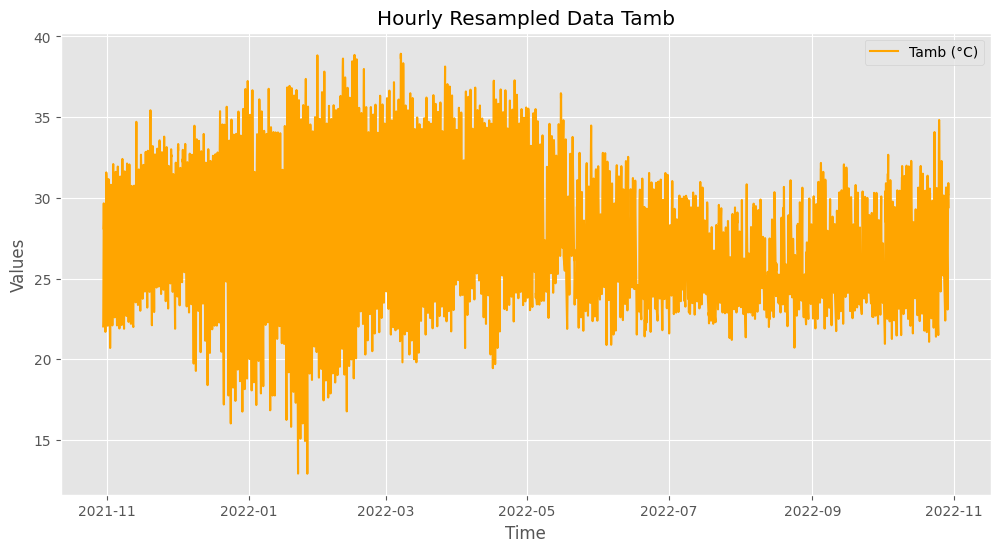

In [35]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_data, x=hourly_data.index, y='Tamb', label='Tamb (°C)', color='orange')

plt.title('Hourly Resampled Data Tamb')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.show()

##### Monthly Ambient Temperature (Tamb (°C))

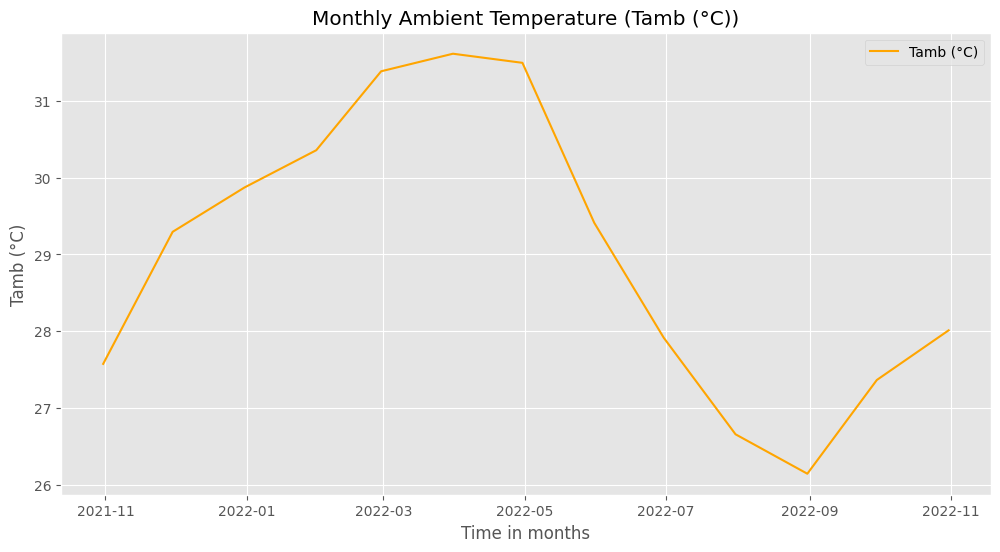

In [36]:
#Tamb over the months
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_data, x=monthly_data.index, y='Tamb', label='Tamb (°C)', color='orange')
plt.title('Monthly Ambient Temperature (Tamb (°C))')
plt.xlabel('Time in months')
plt.ylabel('Tamb (°C)')
plt.legend()
plt.show()

In both graphs we can see the pattern through a year long period. Temprature drops and peaks can be clearly observed.


#### Feature Relationships

Correlation Analysis measures the strength of the linear relationship between two variables and computes their association.


##### Correlation Matrix of Temperature Measures and Solar Radiation

          TModA     TModB       GHI       DNI       DHI
TModA  1.000000  0.982722  0.859105  0.738967  0.543181
TModB  0.982722  1.000000  0.834139  0.726241  0.535276
GHI    0.859105  0.834139  1.000000  0.804303  0.675278
DNI    0.738967  0.726241  0.804303  1.000000  0.151705
DHI    0.543181  0.535276  0.675278  0.151705  1.000000


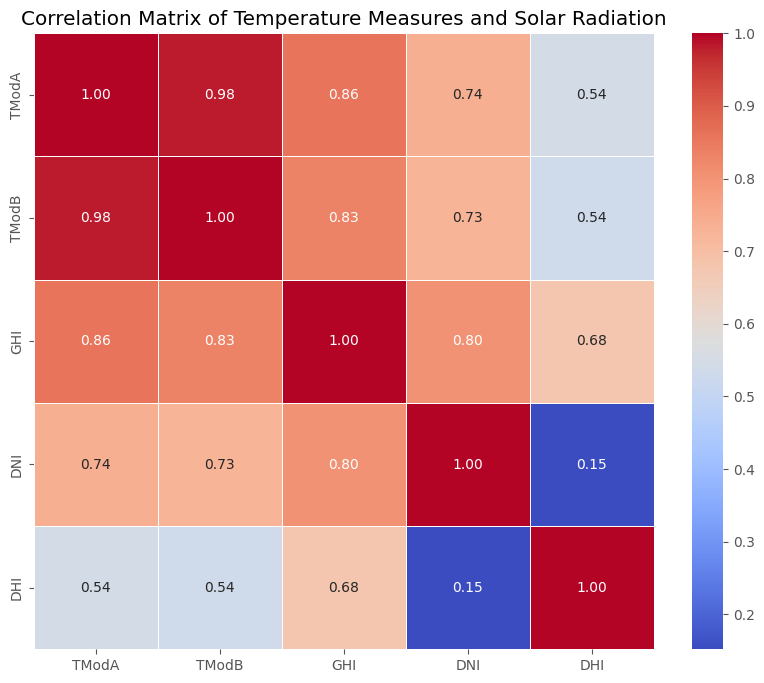

In [37]:
corr_matrix = df[['TModA', 'TModB', 'GHI', 'DNI', 'DHI']].corr()
print(corr_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Temperature Measures and Solar Radiation')
plt.show()

In the heat map we can observe the correlation between each data point. Through the magnitude and color of each cell. While a cooler color, blue, in this case represents weaker correlation, a warmer color denotes stronger correlation. 


#### Correlation Analysis - Wind Conditions (WS, WSgust, WD) and Solar Irradiance 

##### Correlation of Solar Radiation Measures with Wind Speed

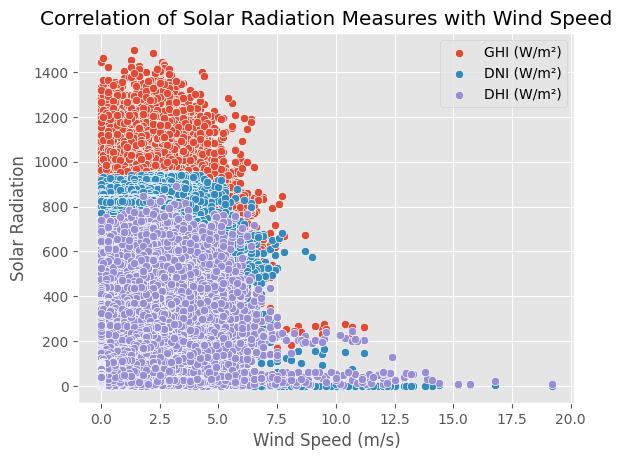

In [38]:
sns.scatterplot(data=df, x='WS', y='GHI', label='GHI (W/m²)')
sns.scatterplot(data=df, x='WS', y='DNI', label='DNI (W/m²)')
sns.scatterplot(data=df, x='WS', y='DHI', label='DHI (W/m²)')

plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Solar Radiation')
plt.title('Correlation of Solar Radiation Measures with Wind Speed')

plt.show()

##### Correlation of Solar Radiation Measures with Wind Gust Speed(Wsgust)

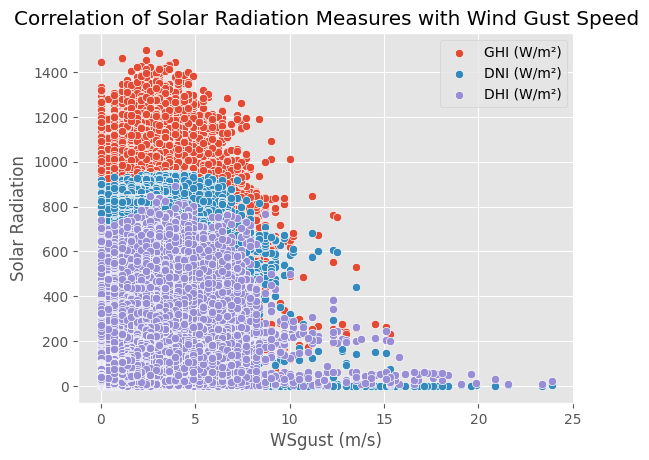

In [39]:
sns.scatterplot(data=df, x='WSgust', y='GHI', label='GHI (W/m²)')
sns.scatterplot(data=df, x='WSgust', y='DNI', label='DNI (W/m²)')
sns.scatterplot(data=df, x='WSgust', y='DHI', label='DHI (W/m²)')

plt.xlabel('WSgust (m/s)')
plt.ylabel('Solar Radiation')
plt.title('Correlation of Solar Radiation Measures with Wind Gust Speed')

plt.show()

##### Correlation of Solar Radiation Measures with Wind Direction(WD) 


/Users/hazel/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


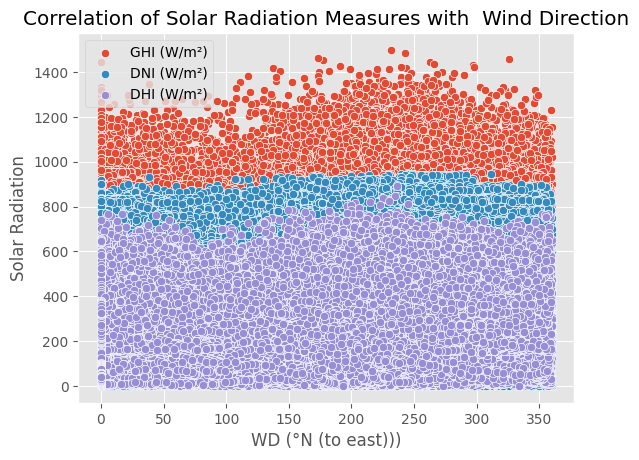

In [40]:
sns.scatterplot(data=df, x='WD', y='GHI', label='GHI (W/m²)')
sns.scatterplot(data=df, x='WD', y='DNI', label='DNI (W/m²)')
sns.scatterplot(data=df, x='WD', y='DHI', label='DHI (W/m²)')

plt.xlabel('WD (°N (to east)))')
plt.ylabel('Solar Radiation')
plt.title('Correlation of Solar Radiation Measures with  Wind Direction')

plt.show()

From the previous correlation plots we can deduce that Wind conditions and Solar Irradiance don't have a linear correlation. 

#### Wind Analysis

##### Windrose - Distribution of Wind Speed and Direction

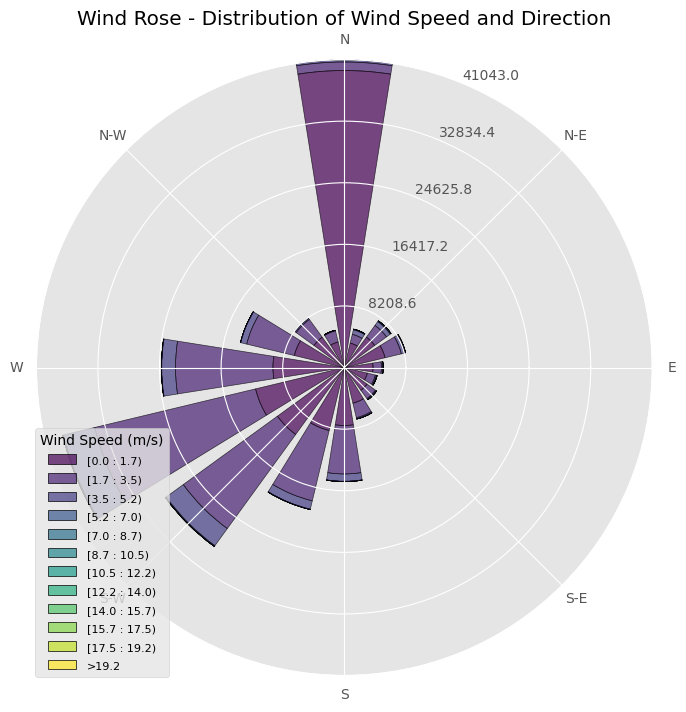

In [41]:
wind_speed = df['WS']  
wind_directions = df['WD']

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='windrose')

ax.bar(wind_directions, wind_speed, bins=12, opening=0.8, edgecolor='black', alpha=0.7)
ax.set_title("Wind Rose - Distribution of Wind Speed and Direction")
ax.set_legend(title="Wind Speed (m/s)")

# Show the plot
plt.show()

In the previous plot we can see which directions have higher wind intensity. The North and South West directions have higher intensity, 

##### Radial Bar Plot : Wind Speed and Direction Variability

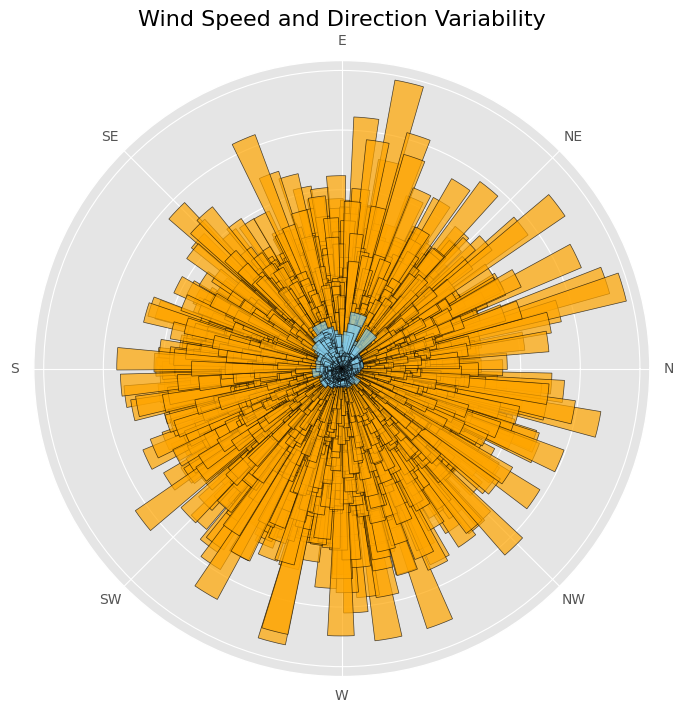

In [42]:
wind_speed = df['WS']  
wind_direction = df['WD']  
wind_direction_std = df['WDstdev']  

angles = np.radians(wind_direction)

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': 'polar'})
ax.bar(angles, wind_direction_std, width=0.1, bottom=0.0, color='orange', edgecolor='black', alpha=0.7)
ax.bar(angles, wind_speed, width=0.3, bottom=0.0, color='skyblue', edgecolor='black', alpha=0.7)

ax.set_title('Wind Speed and Direction Variability', fontsize=16)
ax.set_yticklabels([])  
ax.set_xticks(np.radians(np.arange(0, 360, 45))) 
ax.set_xticklabels(['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW'])

# Show the plot
plt.show()

#### Temprature Analysis

#### Correlation Matrix of Temperature, RH, and Solar Radiation

          Tamb        RH       GHI       DNI       DHI
Tamb  1.000000 -0.847390  0.469011  0.451125  0.251030
RH   -0.847390  1.000000 -0.400521 -0.456811 -0.133440
GHI   0.469011 -0.400521  1.000000  0.804303  0.675278
DNI   0.451125 -0.456811  0.804303  1.000000  0.151705
DHI   0.251030 -0.133440  0.675278  0.151705  1.000000


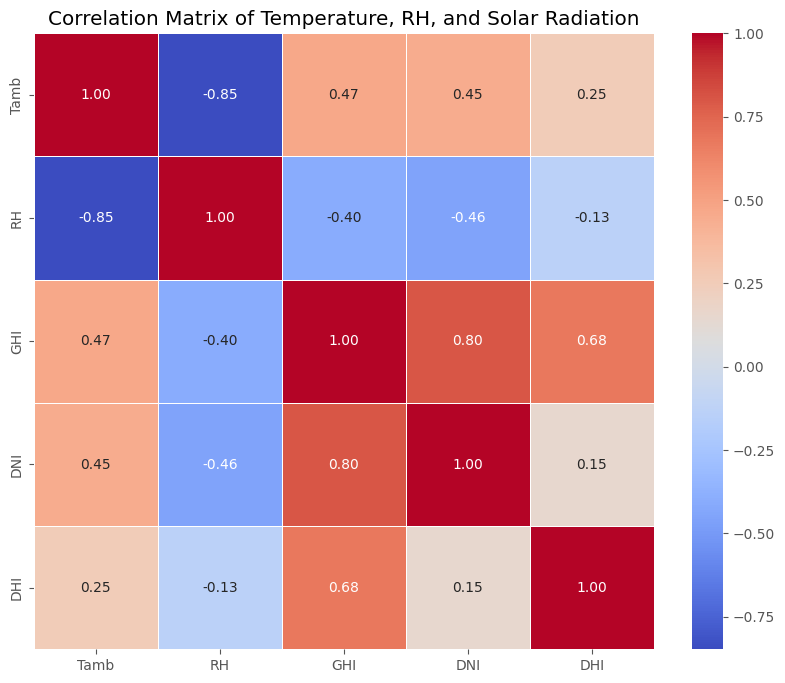

In [43]:
corr_matrix = df[['Tamb', 'RH', 'GHI', 'DNI', 'DHI']].corr()
print(corr_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Temperature, RH, and Solar Radiation')
plt.show()

##### Scatter Plot - Temperature vs. Relative Humidity

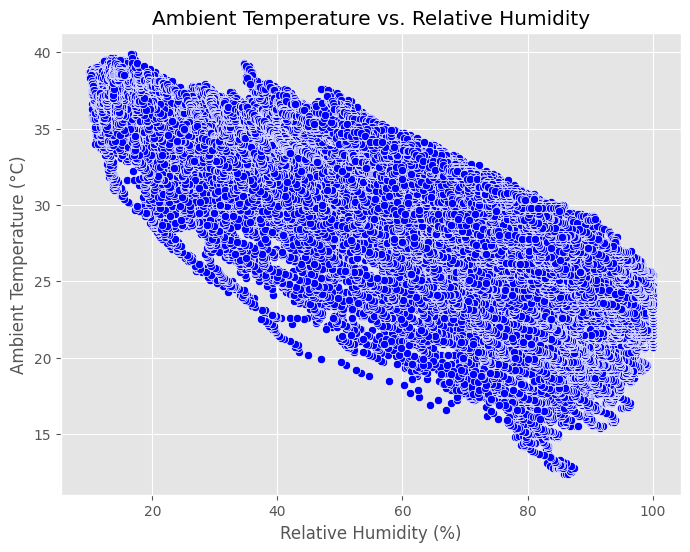

In [44]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='RH', y='Tamb', data=df, color='blue')
plt.title('Ambient Temperature vs. Relative Humidity')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Ambient Temperature (°C)')
plt.show()

Here we can see that Ambient Temperature and Relative Humidity have a negative linear correlation.

##### Scatter Plot - Global Horizontal Irradiance (GHI) vs. Relative Humidity

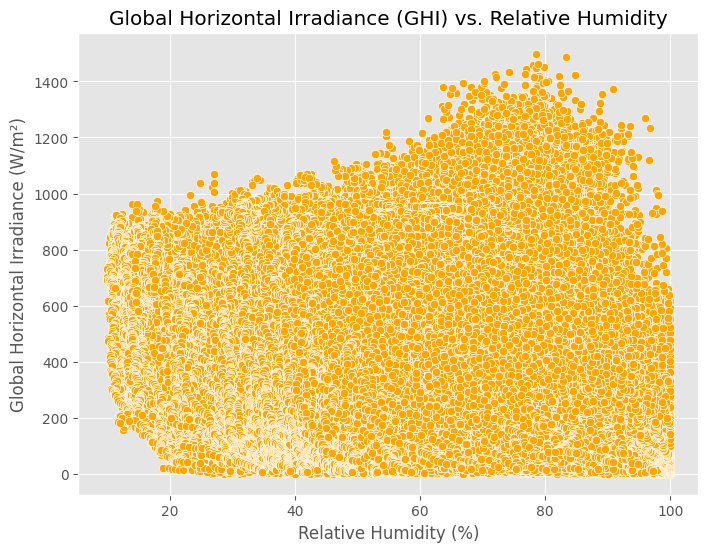

In [45]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='RH', y='GHI', data=df, color='orange')

plt.title('Global Horizontal Irradiance (GHI) vs. Relative Humidity')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Global Horizontal Irradiance (W/m²)')

plt.show()

##### Scatter Plot - Direct Normal Irradiance (DNI) vs. Relative Humidity

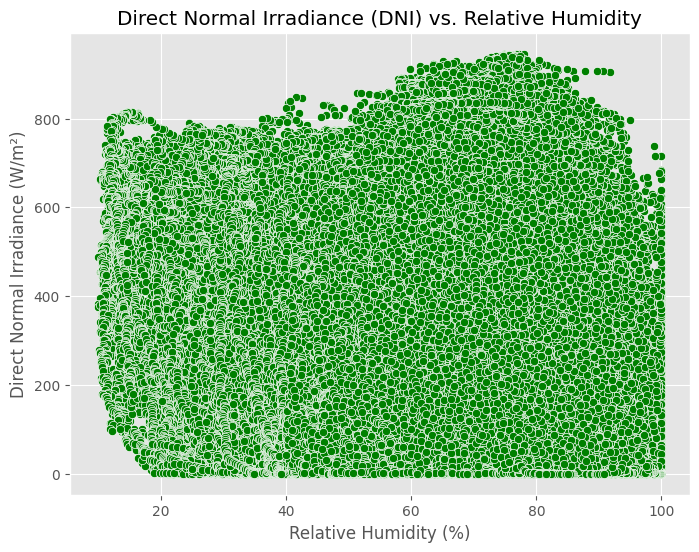

In [46]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='RH', y='DNI', data=df, color='green')
plt.title('Direct Normal Irradiance (DNI) vs. Relative Humidity')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Direct Normal Irradiance (W/m²)')
plt.show()

##### Scatter Plot - Diffuse Horizontal Irradiance (DHI) vs. Relative Humidity

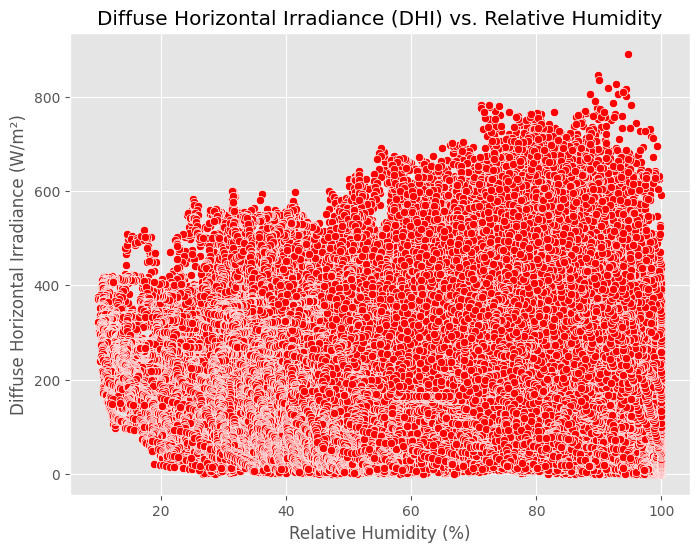

In [47]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='RH', y='DHI', data=df, color='red')

plt.title('Diffuse Horizontal Irradiance (DHI) vs. Relative Humidity')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Diffuse Horizontal Irradiance (W/m²)')

plt.show()

Relative Humidity (RH) has a non-linear relationship with Solar Radiation (DHI, DNI, GHI) measures. 

#### Bubble Chart - GHI vs. Tamb vs. RH and WS 

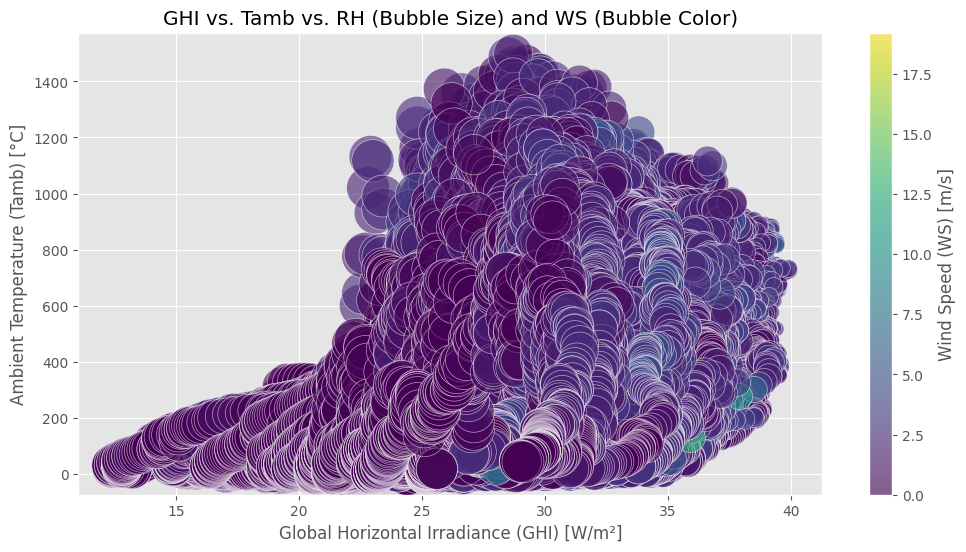

In [48]:
plt.figure(figsize=(12, 6))
plt.scatter(x=df['Tamb'],y=df['GHI'], s=df['RH'] * 10, c=df['WS'], cmap='viridis', alpha=0.6, edgecolors='w',linewidth=0.5)

plt.title('GHI vs. Tamb vs. RH (Bubble Size) and WS (Bubble Color)')
plt.xlabel('Global Horizontal Irradiance (GHI) [W/m²]')
plt.ylabel('Ambient Temperature (Tamb) [°C]')

plt.colorbar(label='Wind Speed (WS) [m/s]')

plt.show()

GHI and Ambient Temprature(Tamb) have a linear positive correlation while RH has a negative correlation with Tamb.